In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [25]:
# Load the dataset
df = pd.read_csv('../data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (1470, 35)

First few rows:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [26]:
# Check target variable distribution
print("Attrition distribution:")
print(df['Attrition'].value_counts())
print("\nAttrition percentage:")
print(df['Attrition'].value_counts(normalize=True) * 100)

Attrition distribution:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Attrition percentage:
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [27]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum().sum())

# Check data types
print("\nData types:")
print(df.dtypes.value_counts())

Missing values:
0

Data types:
int64    26
str       9
Name: count, dtype: int64


In [28]:
# Separate features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Encode target variable (Yes=1, No=0)
le_target = LabelEncoder()
y = le_target.fit_transform(y)

print(f"Target classes: {le_target.classes_}")
print(f"Encoded values: {np.unique(y)}")

Target classes: ['No' 'Yes']
Encoded values: [0 1]


In [29]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"\nNumerical columns ({len(numerical_cols)}): {numerical_cols}")

Categorical columns (8): ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

Numerical columns (26): ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


/var/folders/2v/bn5_gh1x1b14mb5bsw0zj3fh0000gn/T/ipykernel_84003/3822972100.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = X.select_dtypes(include=['object']).columns.tolist()


In [ ]:
# Encode categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("Categorical variables encoded successfully")
print(f"\nFinal dataset shape: {X_encoded.shape}")

Categorical variables encoded successfully

Final dataset shape: (1470, 47)


In [42]:
# Split the data (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"\nTraining set attrition rate: {y_train.mean():.2%}")
print(f"Test set attrition rate: {y_test.mean():.2%}")

Training set size: 1176 samples
Test set size: 294 samples

Training set attrition rate: 16.16%
Test set attrition rate: 15.99%


In [43]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Features scaled successfully")

Features scaled successfully


In [44]:
# Train Logistic Regression
print("Training Logistic Regression...")
lr_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression trained successfully")

Training Logistic Regression...
Logistic Regression trained successfully


=== Logistic Regression Results ===

Classification Report:
              precision    recall  f1-score   support

No Attrition       0.92      0.77      0.84       247
   Attrition       0.35      0.66      0.46        47

    accuracy                           0.75       294
   macro avg       0.64      0.71      0.65       294
weighted avg       0.83      0.75      0.78       294


ROC-AUC Score: 0.7990


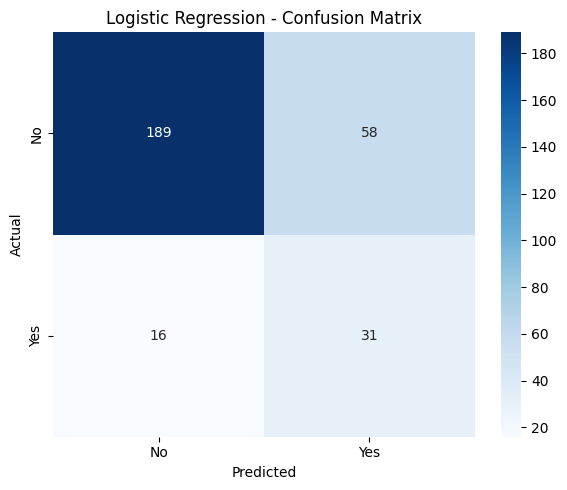

In [45]:
# Evaluate Logistic Regression
print("=== Logistic Regression Results ===\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['No Attrition', 'Attrition']))

print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [13]:
# Train Random Forest
print("Training Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest trained successfully")

Training Random Forest...
Random Forest trained successfully


=== Random Forest Results ===

Classification Report:
              precision    recall  f1-score   support

No Attrition       0.85      0.99      0.91       247
   Attrition       0.50      0.06      0.11        47

    accuracy                           0.84       294
   macro avg       0.67      0.53      0.51       294
weighted avg       0.79      0.84      0.78       294


ROC-AUC Score: 0.7637


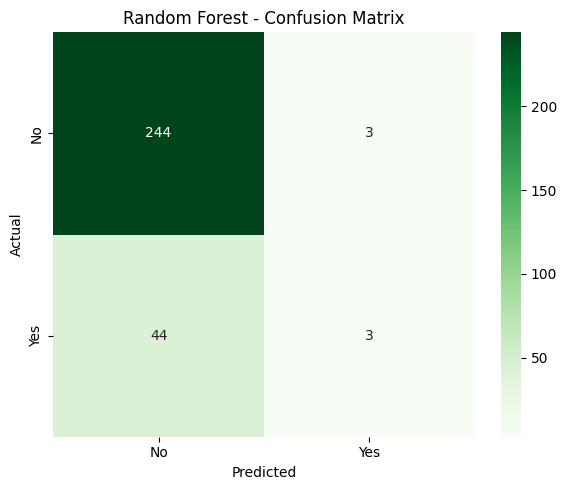

In [46]:
# Evaluate Random Forest
print("=== Random Forest Results ===\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['No Attrition', 'Attrition']))

print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [47]:
# Train Gradient Boosting
print("Training Gradient Boosting...")
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

print("Gradient Boosting trained successfully")

Training Gradient Boosting...
Gradient Boosting trained successfully


=== Gradient Boosting Results ===

Classification Report:
              precision    recall  f1-score   support

No Attrition       0.86      0.97      0.91       247
   Attrition       0.53      0.19      0.28        47

    accuracy                           0.84       294
   macro avg       0.70      0.58      0.60       294
weighted avg       0.81      0.84      0.81       294


ROC-AUC Score: 0.7987


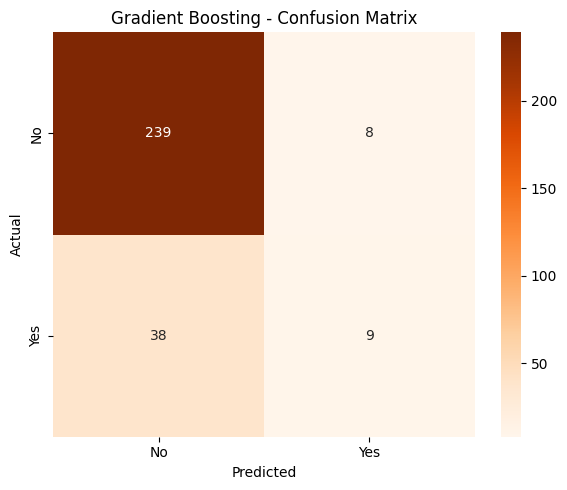

In [48]:
# Evaluate Gradient Boosting
print("=== Gradient Boosting Results ===\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_gb, target_names=['No Attrition', 'Attrition']))

print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_gb):.4f}")

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Gradient Boosting - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

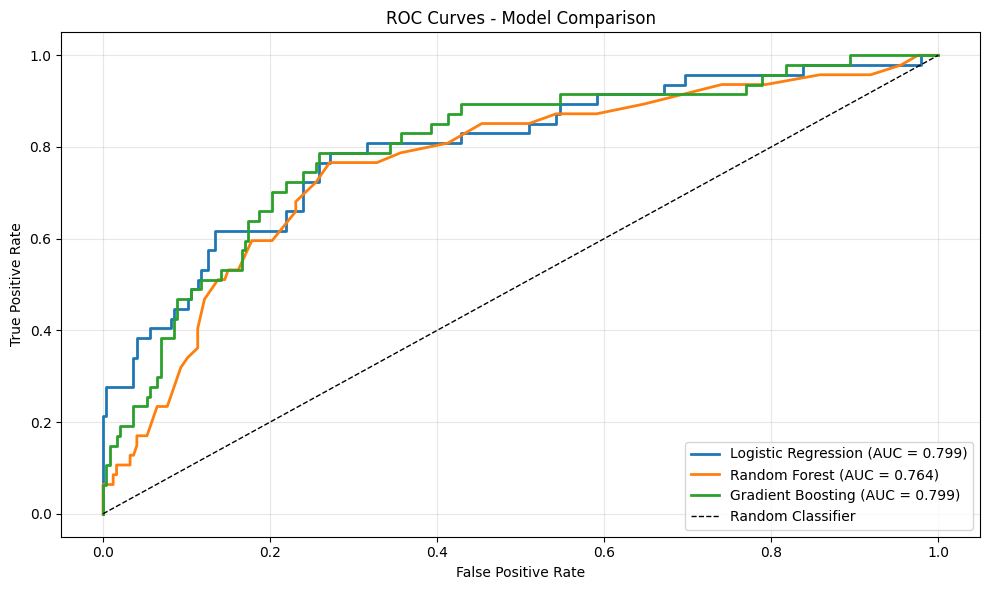

In [49]:
# Compare ROC curves
plt.figure(figsize=(10, 6))

# Logistic Regression ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_proba_lr):.3f})', linewidth=2)

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_pred_proba_rf):.3f})', linewidth=2)

# Gradient Boosting ROC
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_score(y_test, y_pred_proba_gb):.3f})', linewidth=2)

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [50]:
# Summary comparison table
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
predictions = [y_pred_lr, y_pred_rf, y_pred_gb]
probas = [y_pred_proba_lr, y_pred_proba_rf, y_pred_proba_gb]

results = []
for model_name, y_pred, y_proba in zip(models, predictions, probas):
    results.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    })

results_df = pd.DataFrame(results)
print("\n=== Model Comparison Summary ===\n")
print(results_df.to_string(index=False))


=== Model Comparison Summary ===

              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression  0.748299   0.348315 0.659574  0.455882 0.799035
      Random Forest  0.840136   0.500000 0.063830  0.113208 0.763718
  Gradient Boosting  0.843537   0.529412 0.191489  0.281250 0.798691


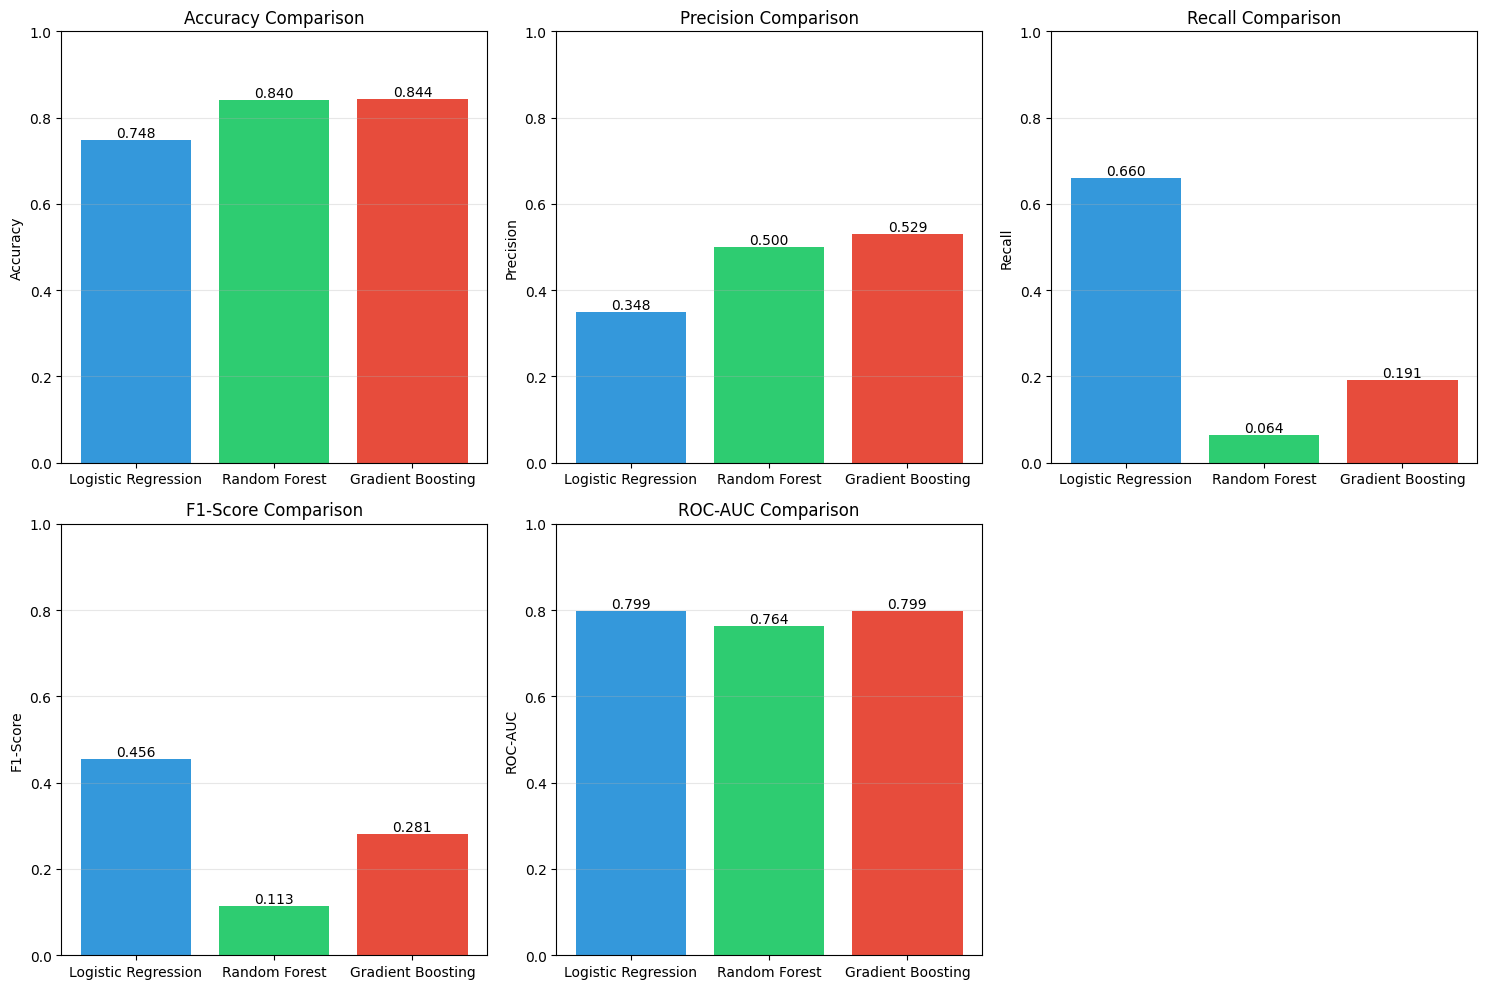

In [19]:
# Visualize model comparison
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 3, idx % 3]
    values = results_df[metric].values
    bars = ax.bar(models, values, color=['#3498db', '#2ecc71', '#e74c3c'])
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} Comparison')
    ax.set_ylim([0, 1])
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom')

# Remove the empty subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

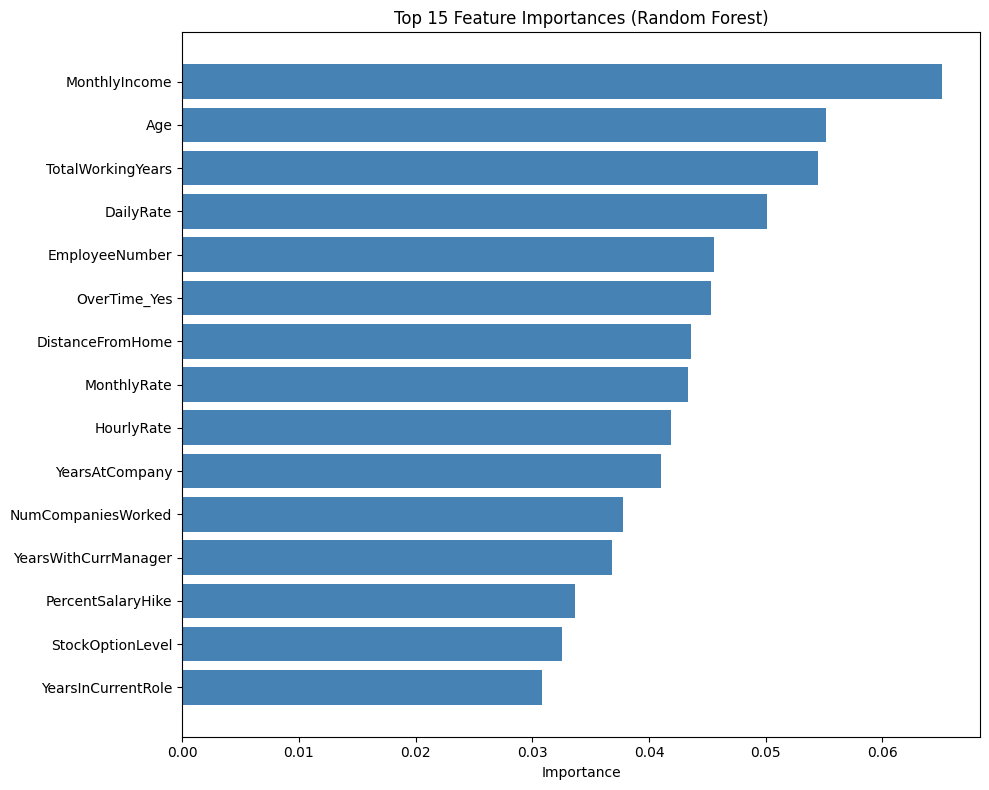


Top 10 Most Important Features:
          Feature  Importance
    MonthlyIncome    0.065104
              Age    0.055181
TotalWorkingYears    0.054465
        DailyRate    0.050145
   EmployeeNumber    0.045597
     OverTime_Yes    0.045308
 DistanceFromHome    0.043641
      MonthlyRate    0.043305
       HourlyRate    0.041911
   YearsAtCompany    0.041035

Top 10 Most Influential Features (Logistic Regression):
                         Feature  Coefficient
                    OverTime_Yes     1.628474
BusinessTravel_Travel_Frequently     1.597583
   JobRole_Laboratory Technician     1.569270
    JobRole_Sales Representative     1.274779
       JobRole_Research Director    -1.103945
            EducationField_Other    -1.024883
    BusinessTravel_Travel_Rarely     0.906046
            MaritalStatus_Single     0.842848
         JobRole_Human Resources     0.630743
               TotalWorkingYears    -0.609027


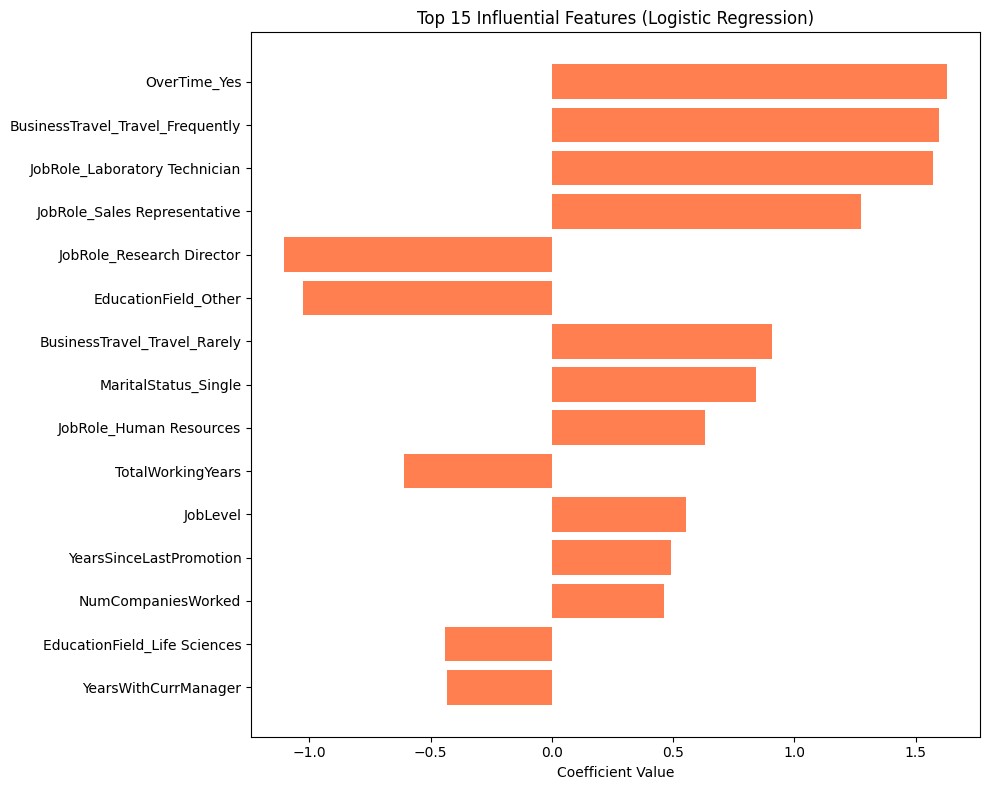

In [51]:
# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['Importance'], color='steelblue')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))

# get feature importance from logistic regression
lr_coefficients = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': lr_model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)
print("\nTop 10 Most Influential Features (Logistic Regression):")
print(lr_coefficients.head(10).to_string(index=False))

# plot top 15 influential features from logistic regression
plt.figure(figsize=(10, 8))
top_lr_features = lr_coefficients.head(15)
plt.barh(range(len(top_lr_features)), top_lr_features['Coefficient'], color='coral')
plt.yticks(range(len(top_lr_features)), top_lr_features['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 15 Influential Features (Logistic Regression)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()